### Necessary libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# options
pd.set_option('display.max_columns', 200)

### Reading Data

In [81]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep = ';')

In [82]:
raw_data.to_csv('../data/interim/total_data.csv', index = False)

### Exploring Data

In [83]:
total_data = pd.read_csv('../data/interim/total_data.csv')
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [84]:
total_data.shape

(41188, 21)

In [85]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Check for Null Values

In [86]:
100 * total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Check Duplicates

In [87]:
total_data[total_data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [88]:
# Amount of duplicates
total_data.duplicated().sum()

12

In [89]:
# Eliminate duplicates
total_data.drop_duplicates(inplace = True)

In [90]:
# New shape of the dataset :)
total_data.shape

(41176, 21)

### Eliminate Irrelevant information

In [91]:
# Irrelevant information / No relevant
columnas = ['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# ELiminate, and update the dataset
total_data.drop(labels = columnas, axis = 1, inplace = True)

In [92]:
total_data.head()

,age,job,marital,education,default,housing,loan,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,no
1,57,services,married,high.school,unknown,no,no,nonexistent,no
2,37,services,married,high.school,no,yes,no,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,nonexistent,no
4,56,services,married,high.school,no,no,yes,nonexistent,no


### Outliers

In [93]:
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.0238,10.42068,17.0,32.0,38.0,47.0,98.0


I can see some outliers in `age` column, let's handle it.

First, visualize the outliers.

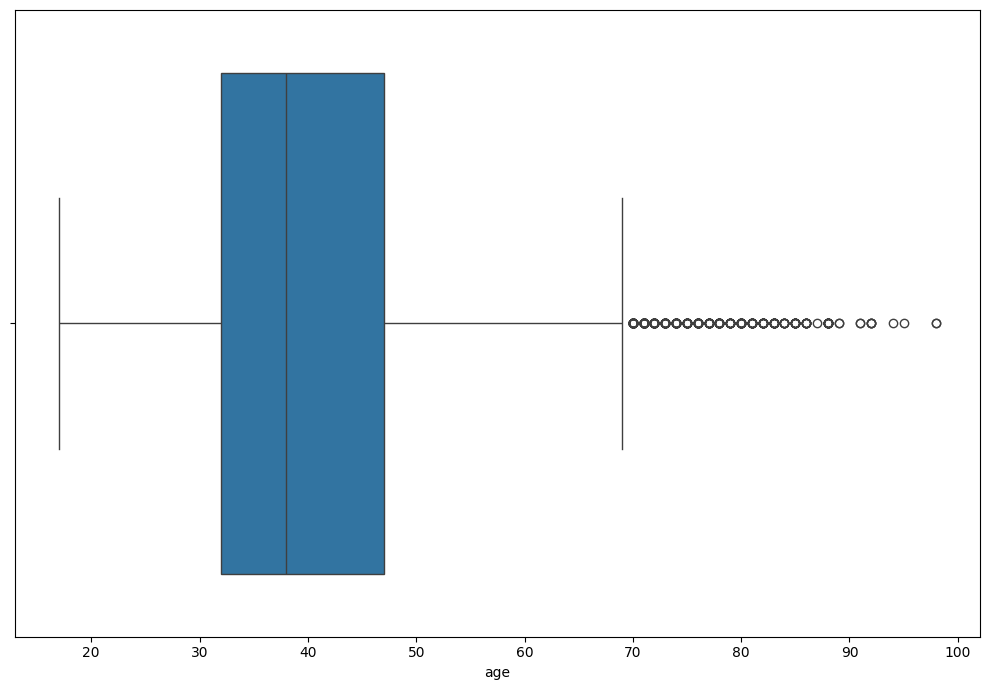

In [94]:
plt.figure(figsize = (10, 7))

sns.boxplot(data = total_data, x = 'age')

plt.tight_layout()
plt.show()

In [95]:
# Calculate IQR
Q1 = total_data['age'].quantile(0.25)
Q3 = total_data['age'].quantile(0.75)

IQR = Q1 - Q3

# Define limits to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = total_data[(total_data['age'] < lower_bound) | (total_data['age'] > upper_bound)]
outliers

,age,job,marital,education,default,housing,loan,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,no
1,57,services,married,high.school,unknown,no,no,nonexistent,no
2,37,services,married,high.school,no,yes,no,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,nonexistent,no
4,56,services,married,high.school,no,no,yes,nonexistent,no
...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,nonexistent,yes


In [96]:
# Transform age column
total_data['age_log'] = np.log(total_data['age'])

# Eliminate age column
total_data.drop(labels = ['age'], axis = 1, inplace = True)

In [97]:
total_data.head()

,job,marital,education,default,housing,loan,poutcome,y,age_log
0,housemaid,married,basic.4y,no,no,no,nonexistent,no,4.025352
1,services,married,high.school,unknown,no,no,nonexistent,no,4.043051
2,services,married,high.school,no,yes,no,nonexistent,no,3.610918
3,admin.,married,basic.6y,no,no,no,nonexistent,no,3.688879
4,services,married,high.school,no,no,yes,nonexistent,no,4.025352


### Feature Engineering

If we look closely, we will see that there are columns that are nominal categorical, as they do not follow a hierarchical order.

In [98]:
total_data['job'] = pd.factorize(total_data['job'])[0]
total_data['marital'] = pd.factorize(total_data['marital'])[0]
total_data['education'] = pd.factorize(total_data['education'])[0]
total_data['default'] = pd.factorize(total_data['default'])[0]
total_data['housing'] = pd.factorize(total_data['housing'])[0]
total_data['loan'] = pd.factorize(total_data['loan'])[0]
total_data['poutcome'] = pd.factorize(total_data['poutcome'])[0]
total_data['y'] = pd.factorize(total_data['y'])[0]

In [99]:
total_data.head()

,job,marital,education,default,housing,loan,poutcome,y,age_log
0,0,0,0,0,0,0,0,0,4.025352
1,1,0,1,1,0,0,0,0,4.043051
2,1,0,1,0,1,0,0,0,3.610918
3,2,0,2,0,0,0,0,0,3.688879
4,1,0,1,0,0,1,0,0,4.025352


### Feature Selection

In [100]:
from sklearn.model_selection import train_test_split

X = total_data.drop(['y'], axis = 1)
y = total_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [101]:
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

In [102]:
train_data.to_csv('../data/processed/clean_bank_train.csv', index = False)
test_data.to_csv('../data/processed/clean_bank_test.csv', index = False)

## Logistic Regression Model

### Read the Processed Data

In [103]:
train_data = pd.read_csv('../data/processed/clean_bank_train.csv')
test_data = pd.read_csv('../data/processed/clean_bank_test.csv')

In [104]:
# Data Preparation
X_train = train_data.drop(['y'], axis=1)
y_train = train_data['y']
X_test = test_data.drop(['y'], axis=1)
y_test = test_data['y']

# Initialization and training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [105]:
# Model prediction
y_pred = model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred)
print('Base Accuracy : {:.2f}%'.format(base_accuracy * 100))

Base Accuracy : 89.02%


In [106]:
# Hyperparameter tuning
hyperparams = {
  'C': np.logspace(-4, 4, 20),
  'penalty': ['l1', 'l2', 'elasticnet', 'none'],
  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [107]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=hyperparams, n_iter=100, scoring='accuracy', cv=5, random_state=42)

In [108]:
# Suppress warnings
def warn(*args, **kwargs):
  pass

warnings.warn = warn

# Perform random search
random_search.fit(X_train, y_train)
print(f'Best Hyperparameters: {random_search.best_params_}')

Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 29.763514416313132}


In [109]:
# Train model with best hyperparameters
best_params = random_search.best_params_

model_random_search = LogisticRegression(solver = best_params['solver'], penalty = best_params['penalty'], C = best_params['C'])

model_random_search.fit(X_train, y_train)
y_pred_random = model_random_search.predict(X_test)

In [110]:
# Evaluate the model
accuracy_random_search = accuracy_score(y_test, y_pred_random)
print('Random Search Accuracy: {:.2f}%'.format(accuracy_random_search * 100))

Random Search Accuracy: 89.01%


In [111]:
from pickle import dump

dump(model_random_search, open('C:/Users/angel/Banking-Marketing-Campaign/models/logistic_regression_C-29.763514416313132_penalty-l2_solver-lbfgs.sav', 'wb'))